# Exploratory Data Analysis on Apple Stock Dataset and Comparative Analysis on 3 Neural Networks (FNN, RNN, LSTM)

**Date:** September 14, 2024

**Author** Muhammad Hassan Saboor

Data Analyst | ML & Deep Learning Enthusiast

*Student of Masters in Data Science @ FAST NUCES (LAHORE)*

# Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, SimpleRNN, Dense
from tensorflow.keras.metrics import MeanAbsoluteError
import warnings

# Important Settings

In [2]:
warnings.filterwarnings("ignore")
pd.set_option("display.max_columns",None)
pd.set_option("display.max_rows",None)

# Loading Dataset

In [3]:
df = pd.read_csv('/kaggle/input/apple-inc-aapl-stock-data-1980-2024/aapl_us_d.csv')

## Viewing the Dataset

In [4]:
df.head()

,Date,Open,High,Low,Close,Volume
0,1984-09-07,0.100763,0.101999,0.099546,0.100763,9.767604e+07
1,1984-09-10,0.100763,0.101071,0.098340,0.100165,7.581254e+07
2,1984-09-11,0.101071,0.103814,0.101071,0.101999,1.787705e+08
3,1984-09-12,0.101999,0.102597,0.098928,0.098928,1.561713e+08
4,1984-09-13,0.104432,0.104730,0.104432,0.104432,2.432310e+08


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10080 entries, 0 to 10079
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    10080 non-null  object 
 1   Open    10080 non-null  float64
 2   High    10080 non-null  float64
 3   Low     10080 non-null  float64
 4   Close   10080 non-null  float64
 5   Volume  10080 non-null  float64
dtypes: float64(5), object(1)
memory usage: 472.6+ KB


# Data Preprocessing

## DateTime Conversion

In [6]:
df['Date'] = pd.to_datetime(df['Date'])
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['Day'] = df['Date'].dt.day

## Sorting

In [7]:
df = df.sort_values(by='Date')

In [8]:
df.head()

,Date,Open,High,Low,Close,Volume,Year,Month,Day
0,1984-09-07,0.100763,0.101999,0.099546,0.100763,9.767604e+07,1984,9,7
1,1984-09-10,0.100763,0.101071,0.098340,0.100165,7.581254e+07,1984,9,10
2,1984-09-11,0.101071,0.103814,0.101071,0.101999,1.787705e+08,1984,9,11
3,1984-09-12,0.101999,0.102597,0.098928,0.098928,1.561713e+08,1984,9,12
4,1984-09-13,0.104432,0.104730,0.104432,0.104432,2.432310e+08,1984,9,13


## Checking the Null Values

In [9]:
df.isnull().sum()

Date      0
Open      0
High      0
Low       0
Close     0
Volume    0
Year      0
Month     0
Day       0
dtype: int64

# Exploratory Data Analysis

### Distribution of Prices (Open, High, Low, Close)

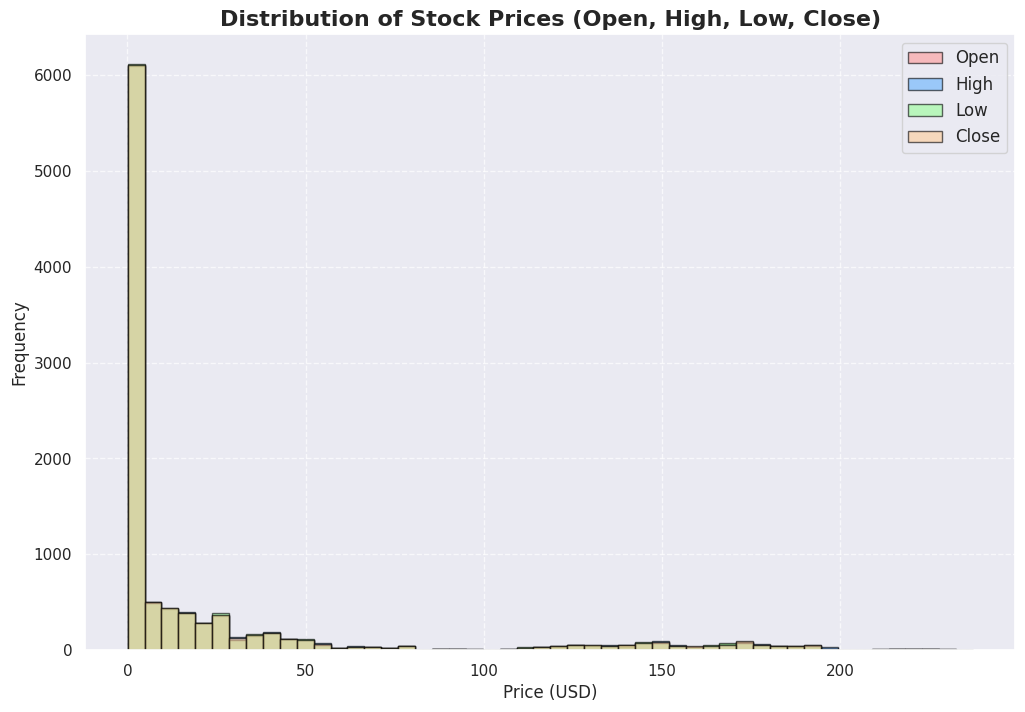

In [10]:
sns.set(style="darkgrid")
colors = ['#FF9999', '#66B2FF', '#99FF99', '#FFCC99']
df[['Open', 'High', 'Low', 'Close']].plot(kind='hist', bins=50, alpha=0.6,color=colors, figsize=(12, 8), edgecolor='black')
plt.title('Distribution of Stock Prices (Open, High, Low, Close)', fontsize=16, weight='bold')
plt.xlabel('Price (USD)', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.legend(['Open', 'High', 'Low', 'Close'], loc='upper right', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

### Volume Distribution

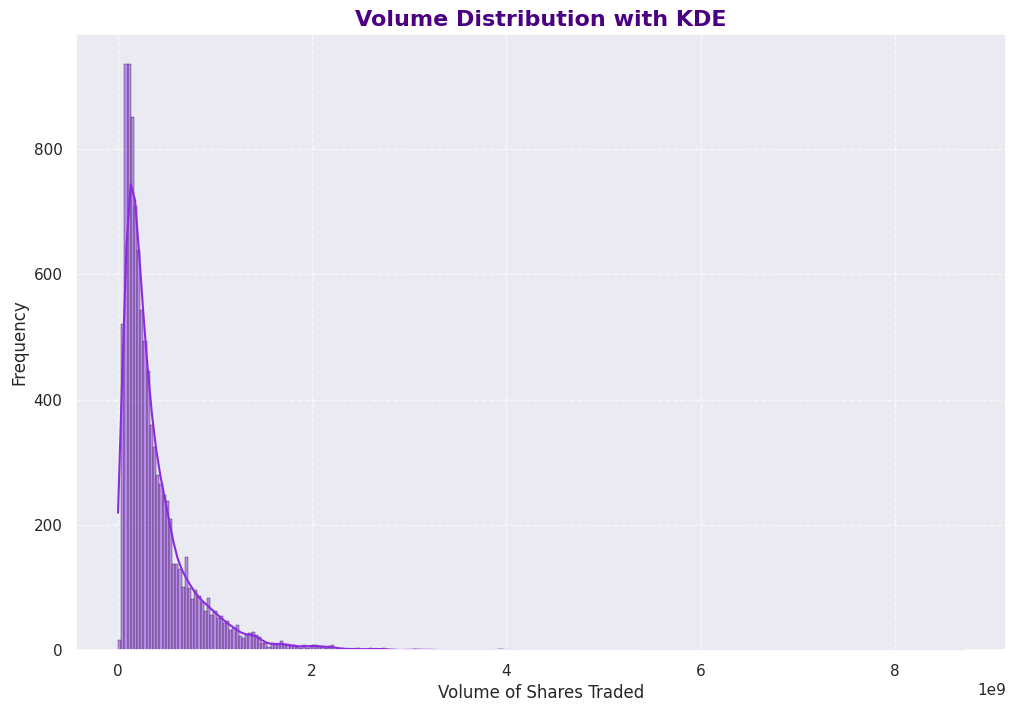

In [11]:
plt.figure(figsize=(12, 8))
sns.histplot(df['Volume'], kde=True, color='#8A2BE2', edgecolor='black')
plt.title('Volume Distribution with KDE', fontsize=16, weight='bold', color='#4B0082')
plt.xlabel('Volume of Shares Traded', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

## Time Series Analysis

### Enhanced Plot for Closing Price Over Time

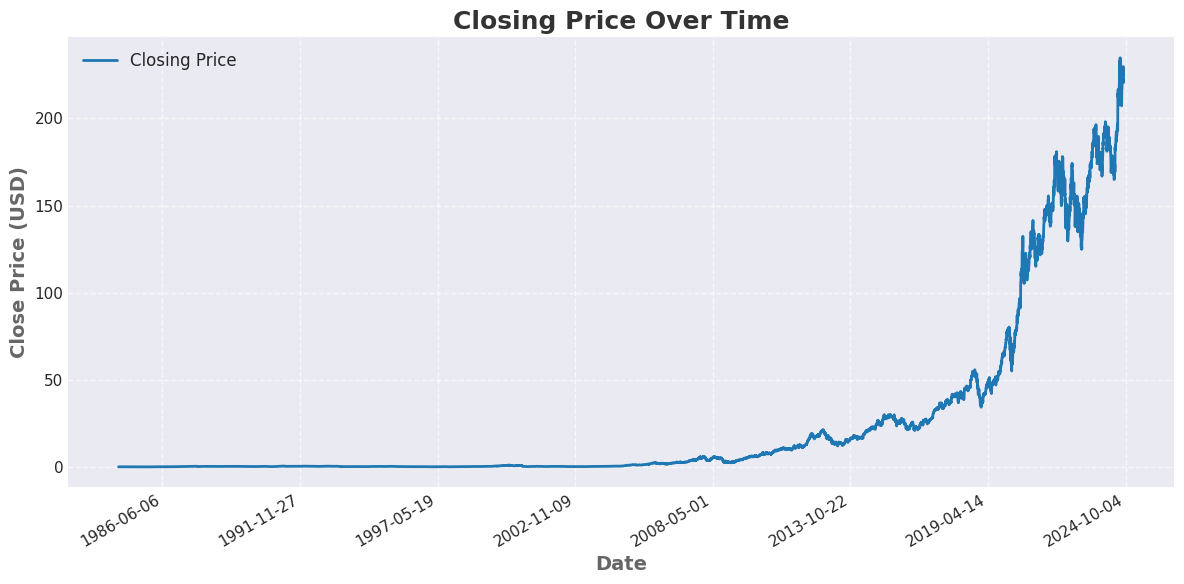

In [12]:
sns.set(style="darkgrid")
plt.style.use('seaborn-darkgrid')
plt.figure(figsize=(12, 6))
plt.plot(df['Date'], df['Close'], color='#1f77b4', linewidth=2, label='Closing Price')
plt.title('Closing Price Over Time', fontsize=18, weight='bold', color='#333333')
plt.xlabel('Date', fontsize=14, weight='bold', color='#666666')
plt.ylabel('Close Price (USD)', fontsize=14, weight='bold', color='#666666')
plt.grid(True, linestyle='--', alpha=0.7)
plt.gca().xaxis.set_major_locator(plt.MaxNLocator(10))  # Limit the number of x-axis ticks
plt.gcf().autofmt_xdate()
plt.legend(fontsize=12)
plt.tight_layout()
plt.show()

## Moving Averages

In [13]:
df['MA50'] = df['Close'].rolling(window=50).mean()
df['MA100'] = df['Close'].rolling(window=100).mean()
df['MA200'] = df['Close'].rolling(window=200).mean()

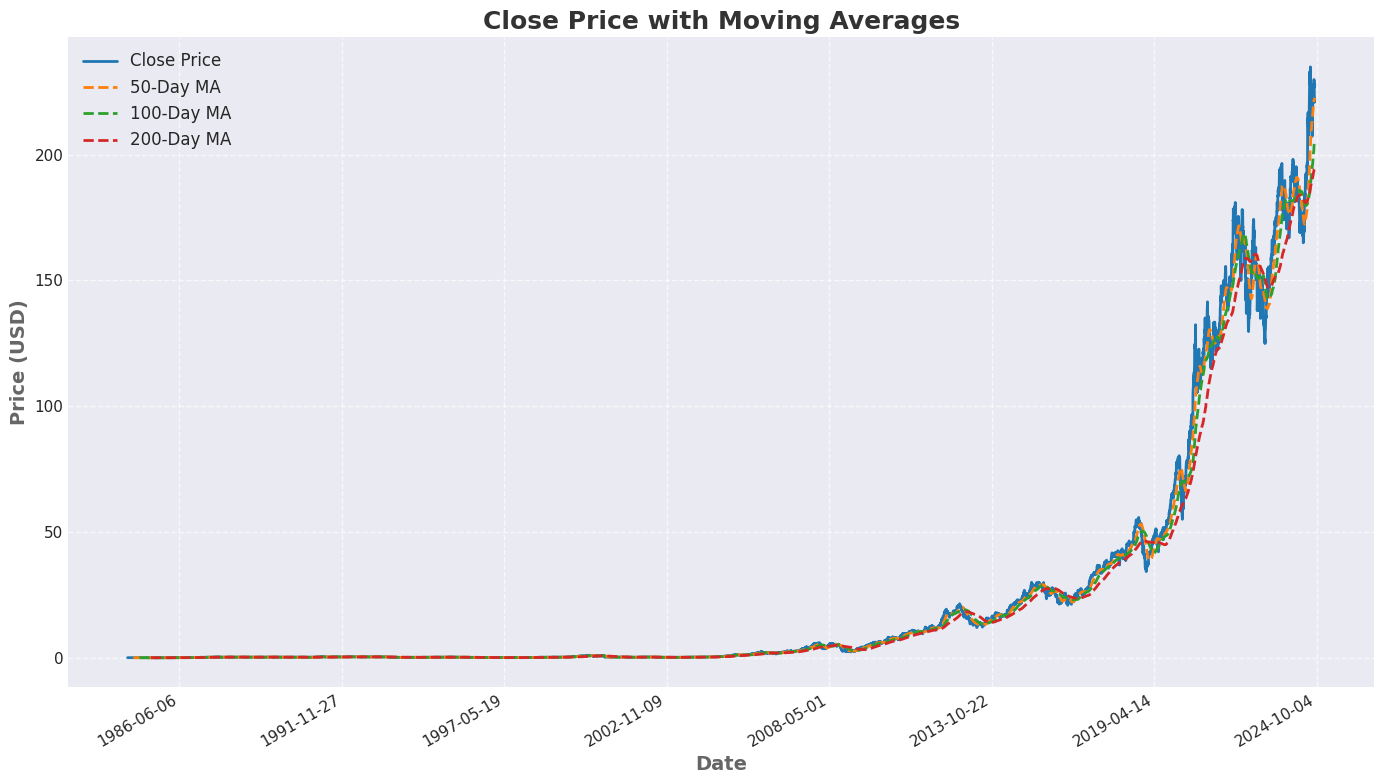

In [14]:
sns.set(style="darkgrid")
plt.style.use('seaborn-darkgrid')

# Plotting the closing prices and moving averages
plt.figure(figsize=(14, 8))

# Plot Close Price
plt.plot(df['Date'], df['Close'], color='#1f77b4', linewidth=2, label='Close Price')

# Plot 50-Day Moving Average
plt.plot(df['Date'], df['MA50'], color='#ff7f0e', linestyle='--', linewidth=2, label='50-Day MA')

# Plot 100-Day Moving Average
plt.plot(df['Date'], df['MA100'], color='#2ca02c', linestyle='--', linewidth=2, label='100-Day MA')

# Plot 200-Day Moving Average
plt.plot(df['Date'], df['MA200'], color='#d62728', linestyle='--', linewidth=2, label='200-Day MA')
plt.title('Close Price with Moving Averages', fontsize=18, weight='bold', color='#333333')
plt.xlabel('Date', fontsize=14, weight='bold', color='#666666')
plt.ylabel('Price (USD)', fontsize=14, weight='bold', color='#666666')
plt.gca().xaxis.set_major_locator(plt.MaxNLocator(10))
plt.gcf().autofmt_xdate()
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend(fontsize=12)
plt.tight_layout()
plt.show()

## Volume Analysis

### Enhanced Plot for Volume vs. Close Price

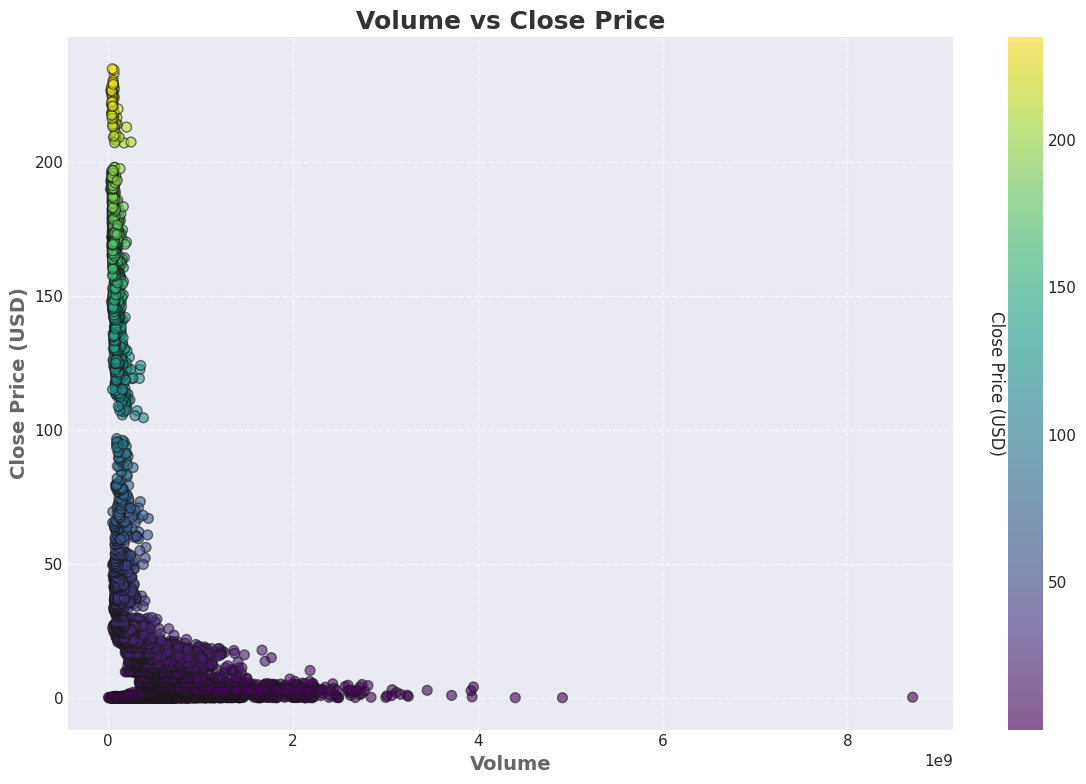

In [15]:
sns.set(style="darkgrid")
plt.style.use('seaborn-darkgrid')
plt.figure(figsize=(12, 8))

# Scatter plot with customized markers
plt.scatter(df['Volume'], df['Close'], alpha=0.6, c=df['Close'], cmap='viridis', edgecolor='k', s=50)

# Adding title and labels with custom font sizes
plt.title('Volume vs Close Price', fontsize=18, weight='bold', color='#333333')
plt.xlabel('Volume', fontsize=14, weight='bold', color='#666666')
plt.ylabel('Close Price (USD)', fontsize=14, weight='bold', color='#666666')

# Adding color bar
cbar = plt.colorbar()
cbar.set_label('Close Price (USD)', rotation=270, labelpad=15)
cbar.ax.yaxis.set_label_position('left')

# Adding grid lines for better readability
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

### Enhanced Plot for Volume Over Time

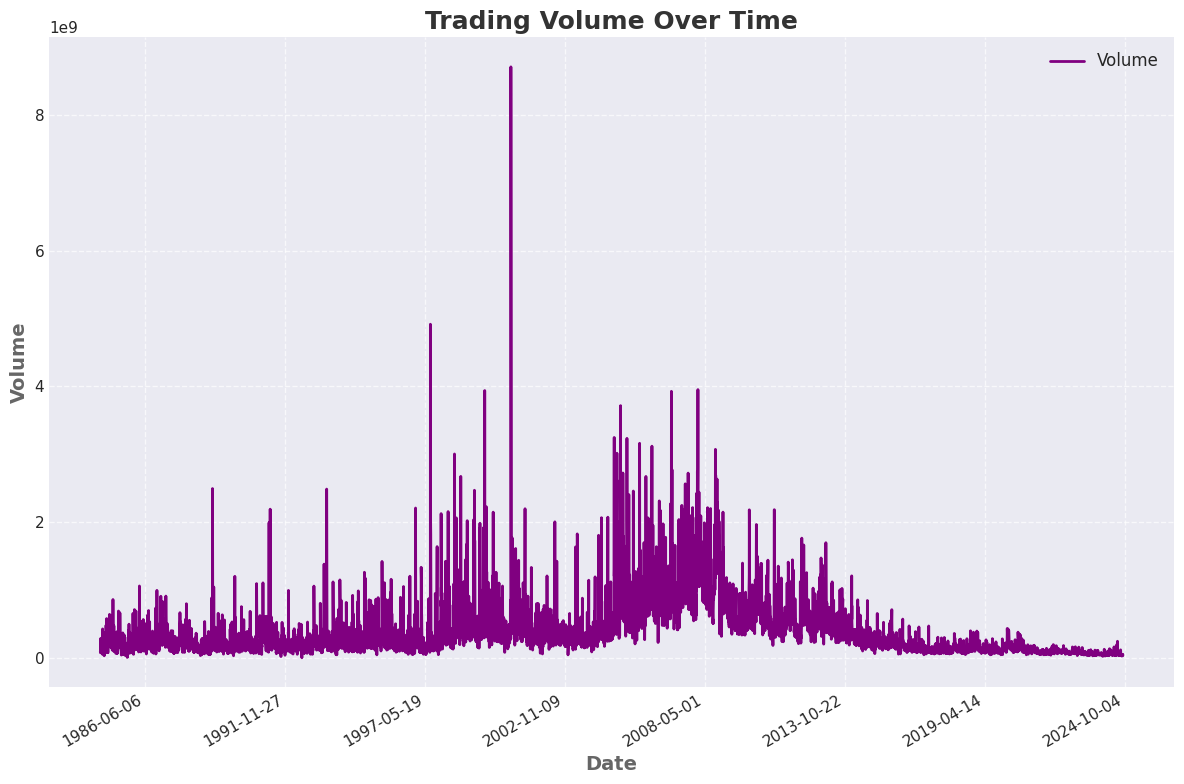

In [16]:
plt.figure(figsize=(12, 8))

# Plot with customized line style
plt.plot(df['Date'], df['Volume'], color='purple', linewidth=2, label='Volume')

# Adding title and labels with custom font sizes
plt.title('Trading Volume Over Time', fontsize=18, weight='bold', color='#333333')
plt.xlabel('Date', fontsize=14, weight='bold', color='#666666')
plt.ylabel('Volume', fontsize=14, weight='bold', color='#666666')

# Formatting x-axis date labels
plt.gca().xaxis.set_major_locator(plt.MaxNLocator(10))  # Limit the number of x-axis ticks
plt.gcf().autofmt_xdate()  # Rotate date labels

# Adding grid lines for better readability
plt.grid(True, linestyle='--', alpha=0.7)

# Adding a legend
plt.legend(fontsize=12)

plt.tight_layout()
plt.show()


## Price Correlations

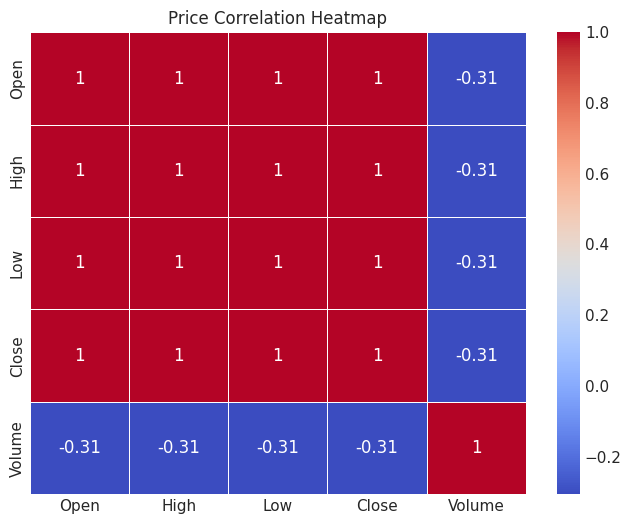

In [17]:
# Correlation matrix between prices
correlation_matrix = df[['Open', 'High', 'Low', 'Close', 'Volume']].corr()

# Heatmap of the correlation matrix
plt.figure(figsize=(8,6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Price Correlation Heatmap')
plt.show()


## Daily Price Changes

### Enhanced Plot for Distribution of Daily Percentage Change

In [18]:
if 'Close' in df.columns:
    df['Daily Change (%)'] = df['Close'].pct_change() * 100
else:
    print("Column 'Close' not found in DataFrame.")

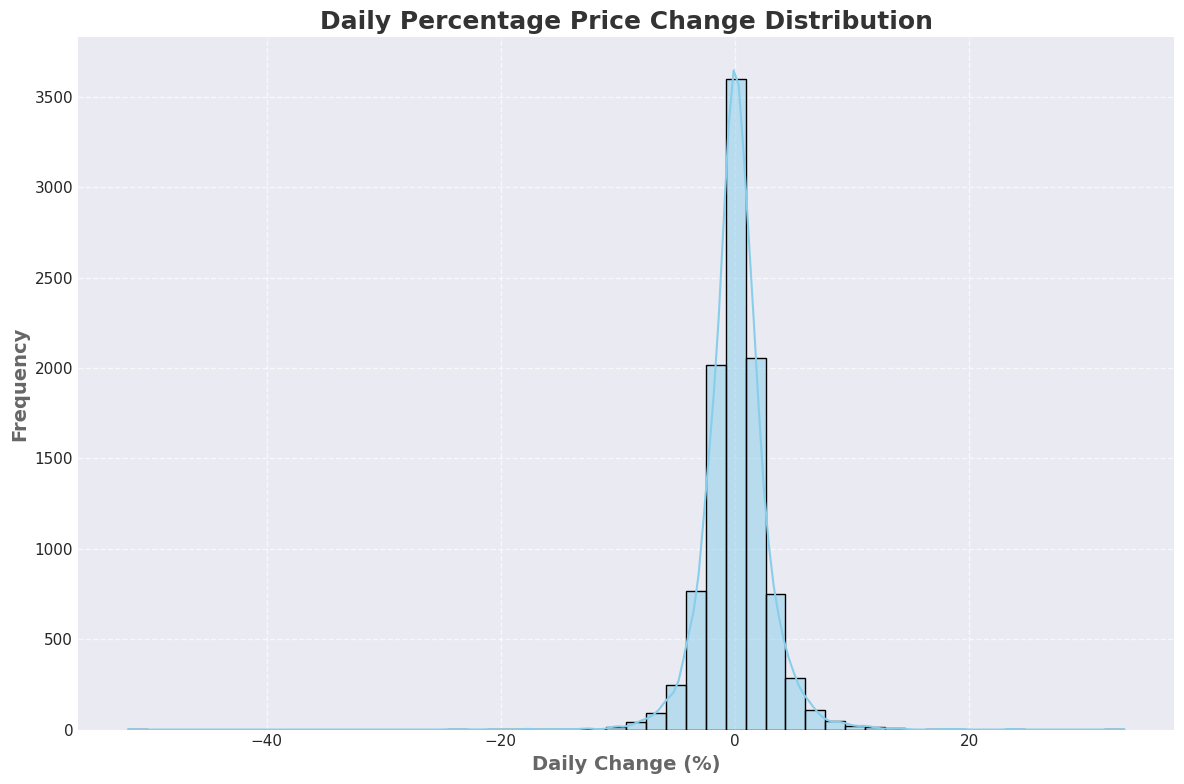

In [19]:
sns.set(style="darkgrid")
plt.style.use('seaborn-darkgrid')

# Plot the distribution of daily percentage change with KDE
plt.figure(figsize=(12, 8))
sns.histplot(df['Daily Change (%)'], kde=True, color='skyblue', edgecolor='black', bins=50)

plt.title('Daily Percentage Price Change Distribution', fontsize=18, weight='bold', color='#333333')
plt.xlabel('Daily Change (%)', fontsize=14, weight='bold', color='#666666')
plt.ylabel('Frequency', fontsize=14, weight='bold', color='#666666')

# Adding grid lines for better readability
plt.grid(True, linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()


### Enhanced Plot for Cumulative Return Over Time

In [20]:
df['Daily Change'] = df['Daily Change (%)'] / 100  # Convert percentage to decimal
df['Cumulative Return'] = (1 + df['Daily Change']).cumprod() - 1

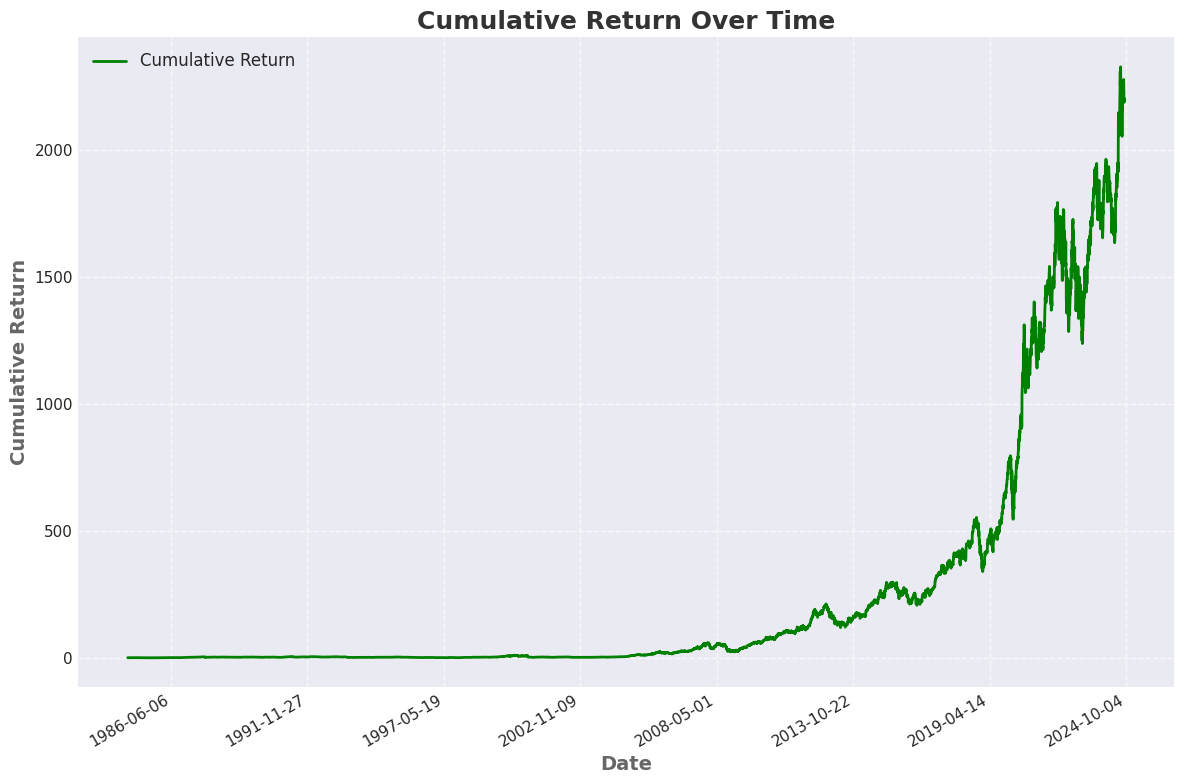

In [21]:
# Plot cumulative returns over time
plt.figure(figsize=(12, 8))

# Plot with customized line style
plt.plot(df['Date'], df['Cumulative Return'], color='green', linewidth=2, label='Cumulative Return')

# Adding title and labels with custom font sizes
plt.title('Cumulative Return Over Time', fontsize=18, weight='bold', color='#333333')
plt.xlabel('Date', fontsize=14, weight='bold', color='#666666')
plt.ylabel('Cumulative Return', fontsize=14, weight='bold', color='#666666')

# Formatting x-axis date labels
plt.gca().xaxis.set_major_locator(plt.MaxNLocator(10))  # Limit the number of x-axis ticks
plt.gcf().autofmt_xdate()  # Rotate date labels

# Adding grid lines for better readability
plt.grid(True, linestyle='--', alpha=0.7)

# Adding a legend
plt.legend(fontsize=12)

plt.tight_layout()
plt.show()


## High-Low Spread Analysis

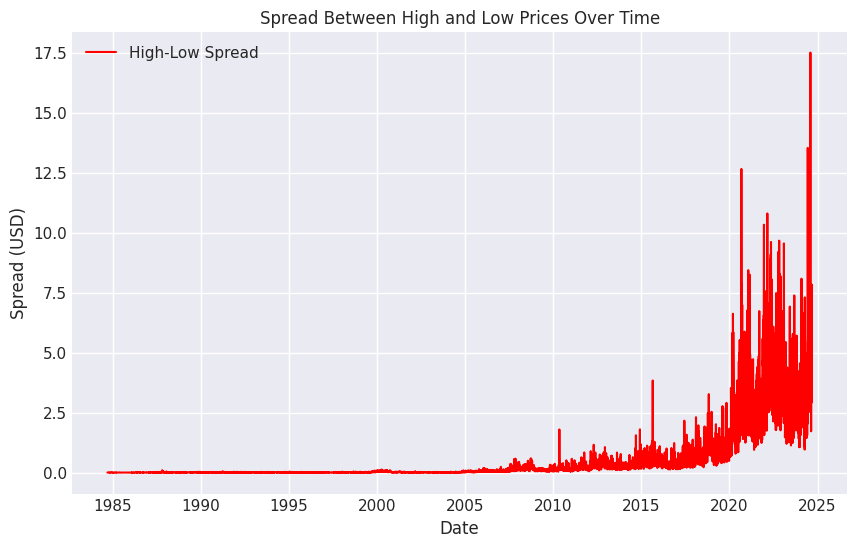

In [22]:
# Spread between High and Low prices
df['Spread'] = df['High'] - df['Low']

# Plot High-Low Spread over time
plt.figure(figsize=(10,6))
plt.plot(df['Date'], df['Spread'], label='High-Low Spread', color='red')
plt.title('Spread Between High and Low Prices Over Time')
plt.xlabel('Date')
plt.ylabel('Spread (USD)')
plt.legend()
plt.show()


## Month and Year Analysis

### Enhanced Plot for Yearly Average Close Price

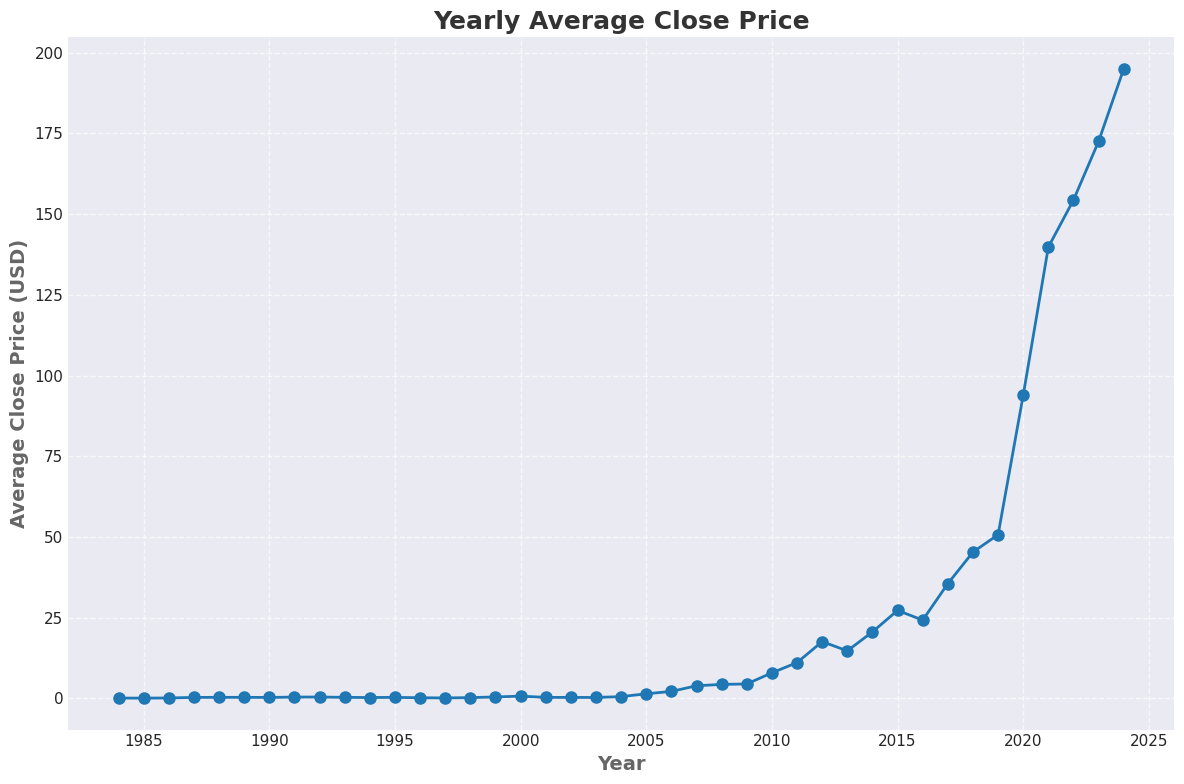

In [23]:
sns.set(style="darkgrid")
plt.style.use('seaborn-darkgrid')

# Group by year and get average prices
df['Year'] = df['Date'].dt.year
yearly_avg = df.groupby('Year')['Close'].mean()

# Plot yearly trend
plt.figure(figsize=(12, 8))
plt.plot(yearly_avg.index, yearly_avg.values, marker='o', linestyle='-', color='#1f77b4', linewidth=2, markersize=8)

# Adding title and labels with custom font sizes
plt.title('Yearly Average Close Price', fontsize=18, weight='bold', color='#333333')
plt.xlabel('Year', fontsize=14, weight='bold', color='#666666')
plt.ylabel('Average Close Price (USD)', fontsize=14, weight='bold', color='#666666')

# Adding grid lines for better readability
plt.grid(True, linestyle='--', alpha=0.7)

# Adding a legend
plt.legend(fontsize=12)

plt.tight_layout()
plt.show()

### Enhanced Plot for Monthly Average Close Price

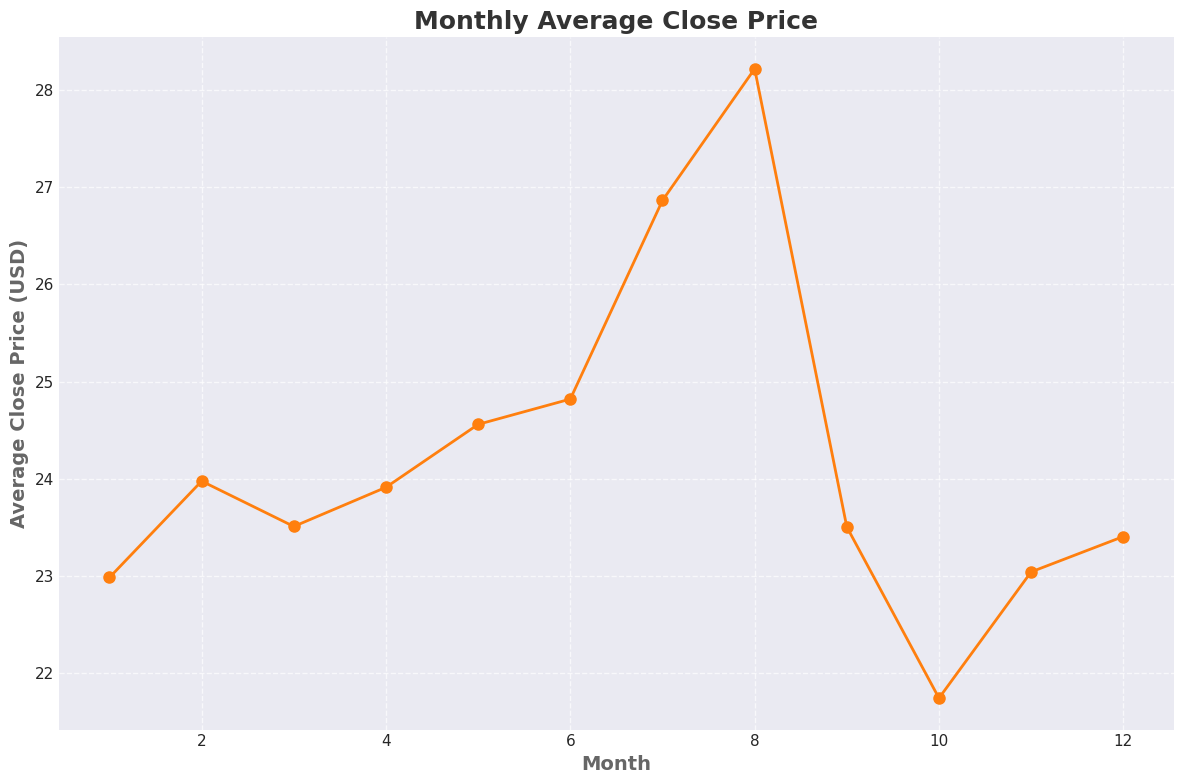

In [24]:
monthly_avg = df.groupby('Month')['Close'].mean()

# Plot monthly trend
plt.figure(figsize=(12, 8))
plt.plot(monthly_avg.index, monthly_avg.values, marker='o', linestyle='-', color='#ff7f0e', linewidth=2, markersize=8)

# Adding title and labels with custom font sizes
plt.title('Monthly Average Close Price', fontsize=18, weight='bold', color='#333333')
plt.xlabel('Month', fontsize=14, weight='bold', color='#666666')
plt.ylabel('Average Close Price (USD)', fontsize=14, weight='bold', color='#666666')

# Adding grid lines for better readability
plt.grid(True, linestyle='--', alpha=0.7)

# Adding a legend
plt.legend(fontsize=12)

plt.tight_layout()
plt.show()

## Distribution of Gains/Losses

In [25]:
# Count of days with gain vs loss
gain_days = df[df['Close'] > df['Open']].shape[0]
loss_days = df[df['Close'] < df['Open']].shape[0]

print(f'Days with gains: {gain_days}')
print(f'Days with losses: {loss_days}')

# Largest gains and losses
largest_gain = df['Daily Change (%)'].max()
largest_loss = df['Daily Change (%)'].min()

print(f'Largest gain: {largest_gain:.2f}%')
print(f'Largest loss: {largest_loss:.2f}%')


Days with gains: 4836
Days with losses: 4788
Largest gain: 33.25%
Largest loss: -51.85%


# Machine Learning Part

## Feed Forward Neural Network

In [26]:
df_2 = pd.read_csv("/kaggle/input/apple-inc-aapl-stock-data-1980-2024/aapl_us_d.csv")

In [27]:
features = df_2[['Open', 'High', 'Low', 'Volume']]
target = df_2['Close']

In [28]:
# Normalize features
scaler = MinMaxScaler()
scaled_features = scaler.fit_transform(features)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(scaled_features, target, test_size=0.2, random_state=42)

### Defining the Model

In [29]:
# Initialize the FNN model
model = Sequential()

# Add input layer and hidden layers
model.add(Dense(64, input_dim=X_train.shape[1], activation='relu'))
model.add(Dense(32, activation='relu'))

# Add output layer
model.add(Dense(1, activation='linear'))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error', metrics=[MeanAbsoluteError()])

### Train the Model

In [30]:
history_fnn = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.1, verbose=1)

Epoch 1/100


I0000 00:00:1727611112.064444     108 service.cc:145] XLA service 0x7c4dec0060b0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1727611112.064495     108 service.cc:153]   StreamExecutor device (0): Tesla T4, Compute Capability 7.5
I0000 00:00:1727611112.064499     108 service.cc:153]   StreamExecutor device (1): Tesla T4, Compute Capability 7.5


113/227 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 3018.6753 - mean_absolute_error: 24.5088

I0000 00:00:1727611113.293675     108 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


227/227 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - loss: 2799.0203 - mean_absolute_error: 24.1371 - val_loss: 935.5443 - val_mean_absolute_error: 21.4282
Epoch 2/100
227/227 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 529.7028 - mean_absolute_error: 15.8501 - val_loss: 2.7481 - val_mean_absolute_error: 1.2018
Epoch 3/100
227/227 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 2.3648 - mean_absolute_error: 1.1164 - val_loss: 1.0384 - val_mean_absolute_error: 0.7139
Epoch 4/100
227/227 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.8083 - mean_absolute_error: 0.6424 - val_loss: 0.5029 - val_mean_absolute_error: 0.4524
Epoch 5/100
227/227 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.4358 - mean_absolute_error: 0.4113 - val_loss: 0.3636 - val_mean_absolute_error: 0.3386
Epoch 6/100
227/227 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.3345 - mean_absolute_error: 0.2937 - val_loss: 0.3361 - val_mean_absolute_error: 0.2678
Epoch 7/100
227/227 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.3047 - mean_absolute_error: 0.255

### Evaluate the Model

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
Mean Squared Error (MSE): 0.26019721667543255
Mean Absolute Error (MAE): 0.20775169136511903
Root Mean Squared Error (RMSE): 0.5100953015618087


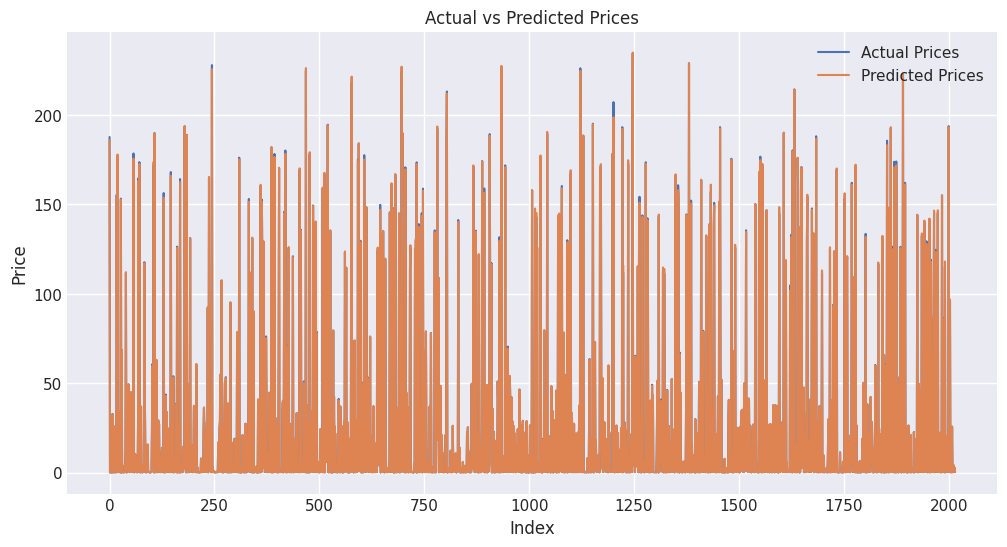

In [31]:
# Make predictions
y_pred = model.predict(X_test)

# Calculate performance metrics
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mse)

print(f'Mean Squared Error (MSE): {mse}')
print(f'Mean Absolute Error (MAE): {mae}')
print(f'Root Mean Squared Error (RMSE): {rmse}')

# Plot actual vs. predicted values
results = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred.flatten()})
plt.figure(figsize=(12, 6))
plt.plot(results['Actual'].values, label='Actual Prices')
plt.plot(results['Predicted'].values, label='Predicted Prices')
plt.title('Actual vs Predicted Prices')
plt.xlabel('Index')
plt.ylabel('Price')
plt.legend()
plt.show()

## Recurrent Neural Network

In [32]:
# Normalize features
scaler = MinMaxScaler()
scaled_features = scaler.fit_transform(features)

# Convert the data to 3D format for RNN
def create_sequences(df_2, target, seq_length):
    X, y = [], []
    for i in range(len(df_2) - seq_length):
        X.append(df_2[i:i+seq_length])
        y.append(target[i+seq_length])
    return np.array(X), np.array(y)

# Define sequence length
seq_length = 10

# Create sequences
X, y = create_sequences(scaled_features, target, seq_length)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


### Define the RNN Model

In [33]:
# Initialize the RNN model
model_rnn = Sequential()

# Add RNN layer
model_rnn.add(SimpleRNN(50, input_shape=(X_train.shape[1], X_train.shape[2]), return_sequences=True))
model_rnn.add(SimpleRNN(50))

# Add output layer
model_rnn.add(Dense(1, activation='linear'))

# Compile the model
model_rnn.compile(optimizer='adam', loss='mean_squared_error', metrics=[tf.keras.metrics.MeanAbsoluteError()])


### Train the Model

In [34]:
history_rnn = model_rnn.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.1, verbose=1)

Epoch 1/100
227/227 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - loss: 2744.7043 - mean_absolute_error: 22.8570 - val_loss: 2141.9275 - val_mean_absolute_error: 17.1930
Epoch 2/100
227/227 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 2167.5740 - mean_absolute_error: 17.7219 - val_loss: 1834.7063 - val_mean_absolute_error: 14.8195
Epoch 3/100
227/227 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 1759.8774 - mean_absolute_error: 14.7239 - val_loss: 1583.1777 - val_mean_absolute_error: 13.1162
Epoch 4/100
227/227 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 1588.7876 - mean_absolute_error: 13.7859 - val_loss: 1369.2654 - val_mean_absolute_error: 12.5773
Epoch 5/100
227/227 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 1290.7518 - mean_absolute_error: 11.9321 - val_loss: 1184.7965 - val_mean_absolute_error: 11.2579
Epoch 6/100
227/227 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 1151.3507 - mean_absolute_error: 11.4605 - val_loss: 1018.4118 - val_mean_absolute_error: 10.0329
Epoch 7/100
227/227 ━━━━━━━━━━━━━━━━━━━━ 1s 3

### Evaluate the Model

63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step
Mean Squared Error (MSE): 2.216223977040274
Mean Absolute Error (MAE): 0.6393810046295954
Root Mean Squared Error (RMSE): 1.4886987529518099


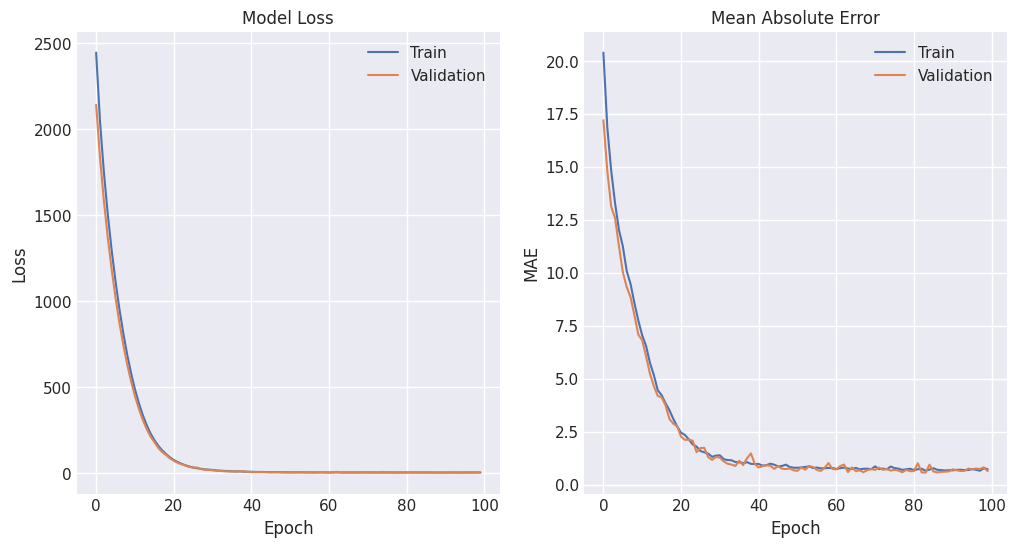

In [35]:
# Make predictions
y_pred = model_rnn.predict(X_test)

# Calculate performance metrics
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mse)

print(f'Mean Squared Error (MSE): {mse}')
print(f'Mean Absolute Error (MAE): {mae}')
print(f'Root Mean Squared Error (RMSE): {rmse}')

# Plot training & validation loss and MAE
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history_rnn.history['loss'])
plt.plot(history_rnn.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper right')

plt.subplot(1, 2, 2)
plt.plot(history_rnn.history['mean_absolute_error'])
plt.plot(history_rnn.history['val_mean_absolute_error'])
plt.title('Mean Absolute Error')
plt.xlabel('Epoch')
plt.ylabel('MAE')
plt.legend(['Train', 'Validation'], loc='upper right')

plt.show()

### Visualize Predictions

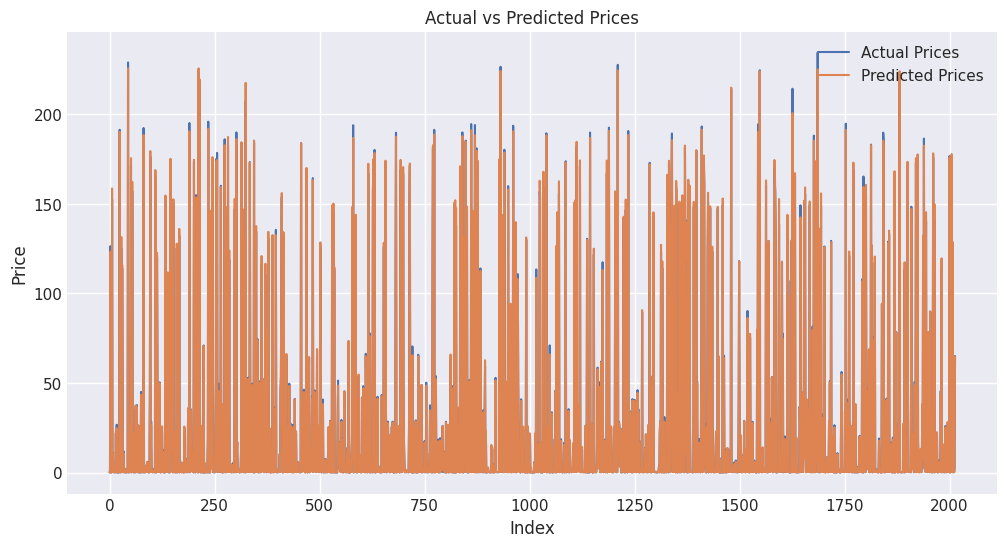

In [36]:
# Convert predictions and actual values to a DataFrame for plotting
results = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred.flatten()})
plt.figure(figsize=(12, 6))
plt.plot(results['Actual'].values, label='Actual Prices')
plt.plot(results['Predicted'].values, label='Predicted Prices')
plt.title('Actual vs Predicted Prices')
plt.xlabel('Index')
plt.ylabel('Price')
plt.legend()
plt.show()


## Long Short Term Memory (LSTM)

In [37]:
# Normalize features
scaler = MinMaxScaler()
scaled_features = scaler.fit_transform(features)

# Convert the data to 3D format for LSTM
def create_sequences(df_2, target, seq_length):
    X, y = [], []
    for i in range(len(df_2) - seq_length):
        X.append(df_2[i:i+seq_length])
        y.append(target[i+seq_length])
    return np.array(X), np.array(y)

# Define sequence length
seq_length = 10

# Create sequences
X, y = create_sequences(scaled_features, target, seq_length)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Define the LSTM Model

In [38]:
# Initialize the LSTM model
model_lstm = Sequential()

# Add LSTM layer
model_lstm.add(LSTM(50, input_shape=(X_train.shape[1], X_train.shape[2]), return_sequences=True))
model_lstm.add(LSTM(50))

# Add output layer
model_lstm.add(Dense(1, activation='linear'))

# Compile the model
model_lstm.compile(optimizer='adam', loss='mean_squared_error', metrics=[tf.keras.metrics.MeanAbsoluteError()])


### Train the Model

In [39]:
history_lstm = model_lstm.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.1, verbose=1)

Epoch 1/100
227/227 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - loss: 2653.1880 - mean_absolute_error: 22.5812 - val_loss: 2037.2932 - val_mean_absolute_error: 16.2114
Epoch 2/100
227/227 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 2021.7737 - mean_absolute_error: 16.6734 - val_loss: 1743.2803 - val_mean_absolute_error: 14.3821
Epoch 3/100
227/227 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 1780.4381 - mean_absolute_error: 15.2939 - val_loss: 1503.4884 - val_mean_absolute_error: 12.6917
Epoch 4/100
227/227 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 1482.6700 - mean_absolute_error: 13.0813 - val_loss: 1301.2126 - val_mean_absolute_error: 11.6303
Epoch 5/100
227/227 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 1411.5052 - mean_absolute_error: 13.0302 - val_loss: 1122.8262 - val_mean_absolute_error: 10.8301
Epoch 6/100
227/227 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 1043.3081 - mean_absolute_error: 10.4671 - val_loss: 968.3245 - val_mean_absolute_error: 10.1009
Epoch 7/100
227/227 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms

### Evaluate the Model

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
Mean Squared Error (MSE): 2.570617956548735
Mean Absolute Error (MAE): 0.6804429935876917
Root Mean Squared Error (RMSE): 1.6033146779558698


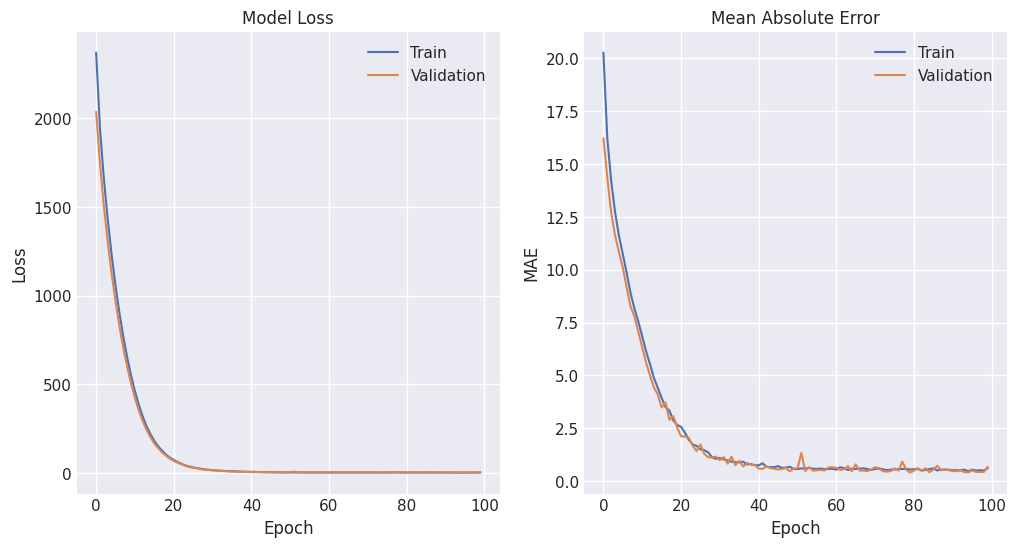

In [40]:
# Make predictions
y_pred = model_lstm.predict(X_test)

# Calculate performance metrics
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mse)

print(f'Mean Squared Error (MSE): {mse}')
print(f'Mean Absolute Error (MAE): {mae}')
print(f'Root Mean Squared Error (RMSE): {rmse}')

# Plot training & validation loss and MAE
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history_lstm.history['loss'])
plt.plot(history_lstm.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper right')

plt.subplot(1, 2, 2)
plt.plot(history_lstm.history['mean_absolute_error'])
plt.plot(history_lstm.history['val_mean_absolute_error'])
plt.title('Mean Absolute Error')
plt.xlabel('Epoch')
plt.ylabel('MAE')
plt.legend(['Train', 'Validation'], loc='upper right')

plt.show()

### Visualize Predictions

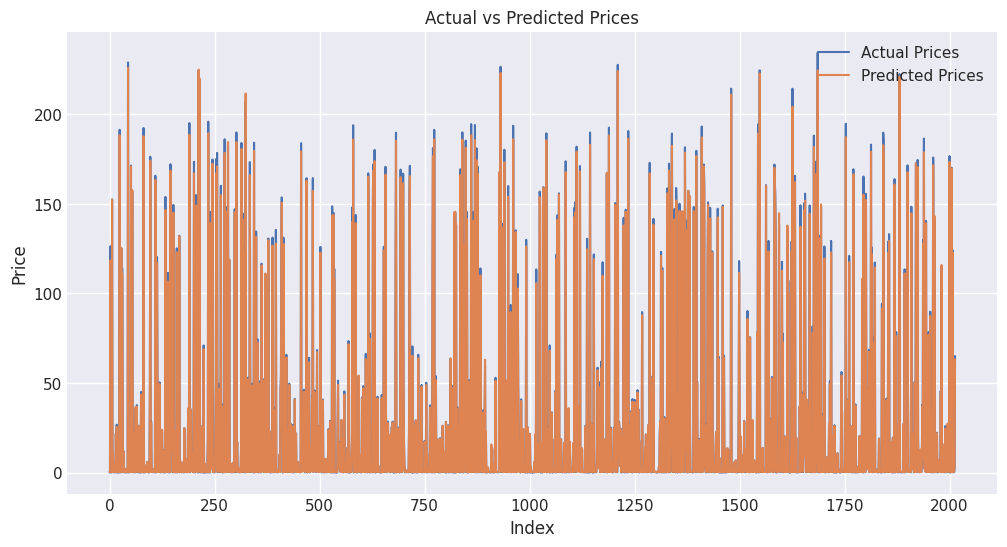

In [41]:
# Convert predictions and actual values to a DataFrame for plotting
results = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred.flatten()})
plt.figure(figsize=(12, 6))
plt.plot(results['Actual'].values, label='Actual Prices')
plt.plot(results['Predicted'].values, label='Predicted Prices')
plt.title('Actual vs Predicted Prices')
plt.xlabel('Index')
plt.ylabel('Price')
plt.legend()
plt.show()

# Comparative Analysis on Neural Networks (FNN , RNN , LSTM)

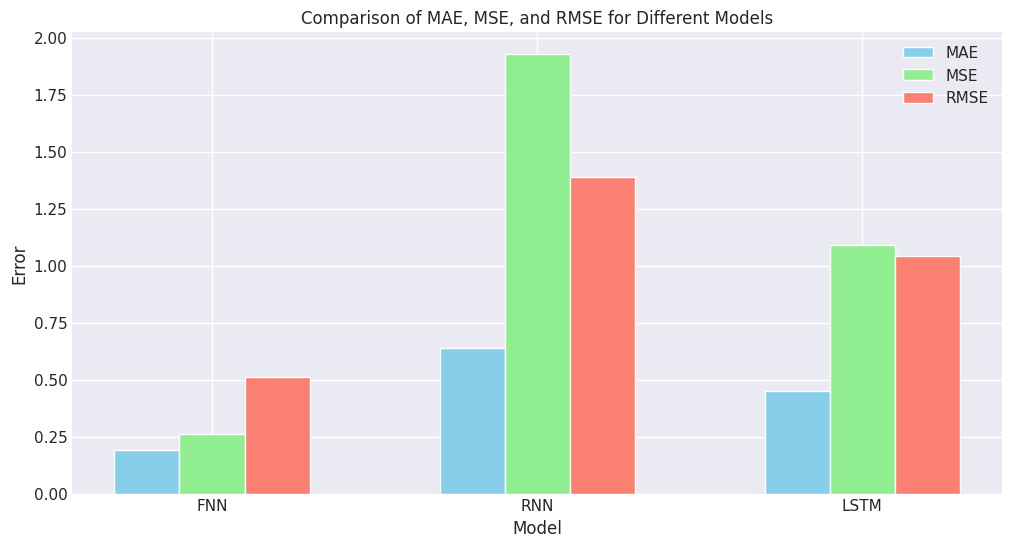

In [42]:
models = ['FNN', 'RNN', 'LSTM']
mae = [0.19, 0.64, 0.45]
mse = [0.26, 1.93, 1.09]
rmse = [0.51, 1.39, 1.04]

# Set up the bar positions
x = np.arange(len(models))
width = 0.2  # Width of the bars

# Create the plots
fig, ax = plt.subplots(figsize=(12, 6))

# Plot MAE
bar_mae = ax.bar(x - width, mae, width, label='MAE', color='skyblue')

# Plot MSE
bar_mse = ax.bar(x, mse, width, label='MSE', color='lightgreen')

# Plot RMSE
bar_rmse = ax.bar(x + width, rmse, width, label='RMSE', color='salmon')

# Add labels and title
ax.set_xlabel('Model')
ax.set_ylabel('Error')
ax.set_title('Comparison of MAE, MSE, and RMSE for Different Models')
ax.set_xticks(x)
ax.set_xticklabels(models)
ax.legend()

plt.show()


# ThankYou